In [67]:
import pandas as pd

%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 6]

# Figuring out how to calculate simpson

In [68]:
df = pd.io.parsers.read_csv('data/yob2016.txt', header=None)

In [69]:
df.head()

,0,1,2
0,Emma,F,19414
1,Olivia,F,19246
2,Ava,F,16237
3,Sophia,F,16070
4,Isabella,F,14722


In [70]:
df_m = df[df[1].str.match('M')]

In [71]:
df_m.head()

,0,1,2
18757,Noah,M,19015
18758,Liam,M,18138
18759,William,M,15668
18760,Mason,M,15192
18761,James,M,14776


In [72]:
total_m = df_m[2].values.sum()

In [73]:
# Simpson
sum([x * (x - 1) for x in df_m[2].values]) / (total_m * (total_m - 1))

0.0025445123750695922

# Now trying it for all years

In [74]:
def get_simpson(year, sex):
    df = pd.io.parsers.read_csv('data/yob{}.txt'.format(year), header=None)
    df_m = df[df[1].str.match(sex)]
    total_m = df_m[2].values.sum()
    return sum([x * (x - 1) for x in df_m[2].values]) / (total_m * (total_m - 1))

In [75]:
years = range(1930, 2017)
diversities = [get_simpson(year, 'M') for year in years]

In [76]:
s = pd.Series(diversities, years)

In [77]:
s.head()

1930    0.015854
1931    0.015886
1932    0.015705
1933    0.015625
1934    0.015564
dtype: float64

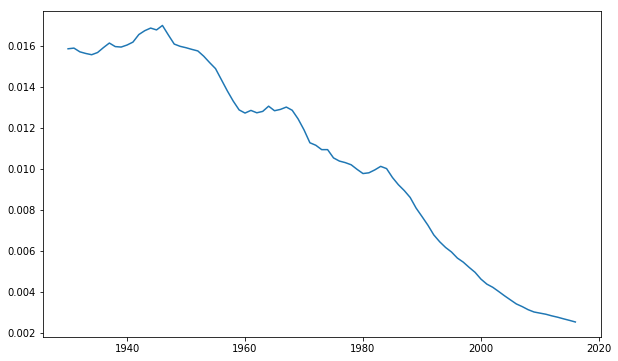

In [78]:
s.plot()

# Figuring it out on reduced names

In [79]:
df_m['reduced_name'] = df_m[0].str.replace('[aeiouy](?=\w)', '')

/Users/dmitry/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [80]:
df_m.head()

,0,1,2,reduced_name
18757,Noah,M,19015,Nh
18758,Liam,M,18138,Lm
18759,William,M,15668,Wllm
18760,Mason,M,15192,Msn
18761,James,M,14776,Jms


In [81]:
df_m_reduced = df_m.groupby('reduced_name')[2].sum()

In [82]:
df_m_reduced.head()

reduced_name
Ab       161
Abba       5
Abbcr     17
Abbkr     86
Abbs      75
Name: 2, dtype: int64

In [83]:
print(df_m.shape)
print(df_m_reduced.shape)

(14111, 4)
(7557,)


In [84]:
total_m_reduced = df_m_reduced.values.sum()
# Simpson
print(sum([x * (x - 1) for x in df_m_reduced.values]) / (total_m * (total_m - 1)))

0.00297255849859


# Reduced names for all years

In [85]:
def get_simpson_reduced(year, sex):
    df = pd.io.parsers.read_csv('data/yob{}.txt'.format(year), header=None)
    df_m = df[df[1].str.match(sex)]
    df_m['reduced_name'] = df_m[0].str.replace('[aeiouy](?=\w)', '')
    df_m_reduced = df_m.groupby('reduced_name')[2].sum()
    total_m_reduced = df_m_reduced.values.sum()
    return sum([x * (x - 1) for x in df_m_reduced.values]) / (total_m * (total_m - 1))

In [86]:
diversities_reduced = [get_simpson_reduced(year, 'M') for year in years]

/Users/dmitry/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [87]:
s_reduced = pd.Series(diversities_reduced, years)

In [88]:
s_reduced.head()

1930    0.005450
1931    0.004899
1932    0.004888
1933    0.004384
1934    0.004737
dtype: float64

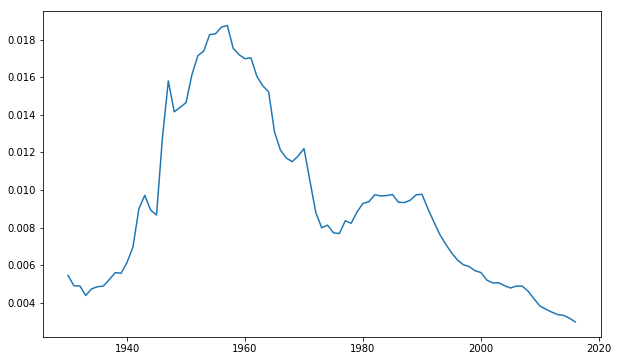

In [89]:
s_reduced.plot()

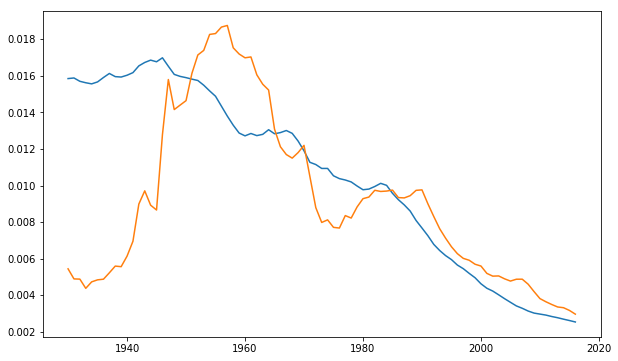

In [90]:
s.plot()
s_reduced.plot()

# Same for girls

In [92]:
diversities_reduced_f = [get_simpson_reduced(year, 'F') for year in years]

/Users/dmitry/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [93]:
diversities_f = [get_simpson(year, 'F') for year in years]

In [94]:
s_f = pd.Series(diversities_f, years)

In [95]:
s_reduced_f = pd.Series(diversities_reduced_f, years)

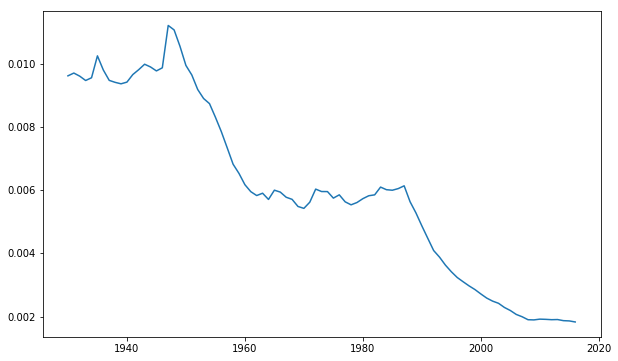

In [96]:
s_f.plot()

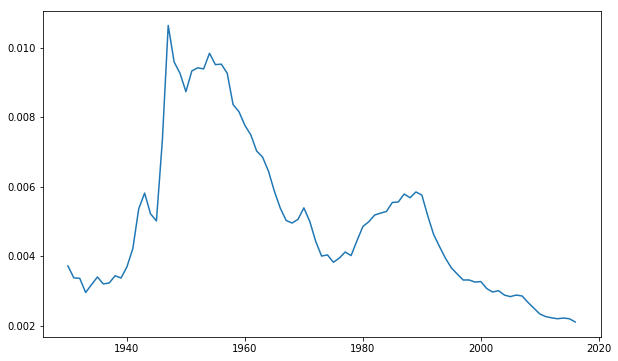

In [97]:
s_reduced_f.plot()

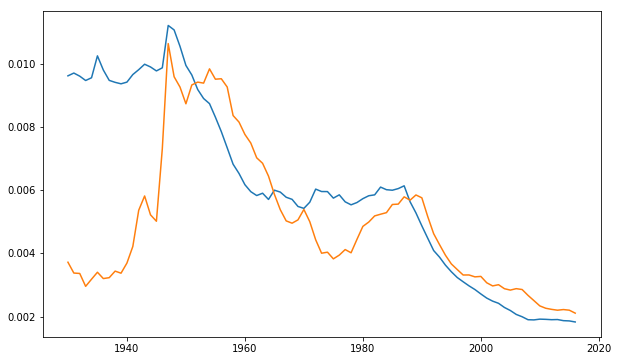

In [98]:
s_f.plot()
s_reduced_f.plot()

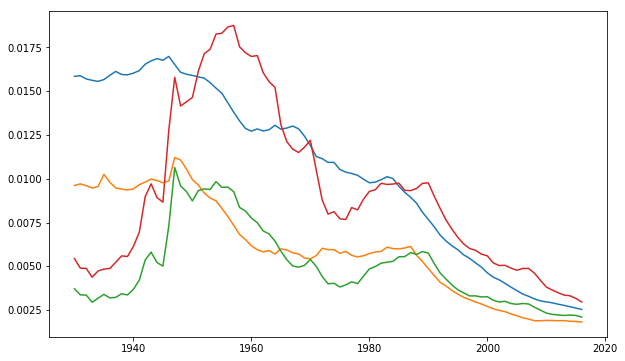

In [101]:
s.plot()
s_f.plot()
s_reduced_f.plot()
s_reduced.plot()

# red - boys names ("reduced names")
# blue - boys spellings ("names")
# green - girls names
# orange - girls spellings

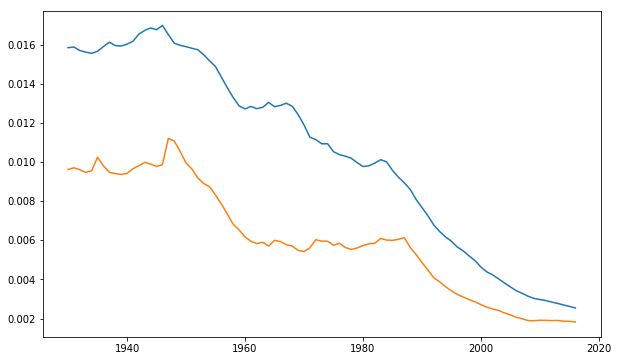

In [103]:
s.plot()
s_f.plot()

In [ ]:
h